Marcus Blaisdell
Cpt_S 437
Homework #2
January 29, 2019
Dr. Cook

1.

Yes, K-means is guaranteed to converge. 

By theorem 16 of the text book "A course in Machine Learning", (Daume, 179), the objective of the k-means clustering algorithm is to optimze the "sum of squared distances from any data point to its assigned center" and formalizes this by the equation:

L(z, u; D) = sigma_n ||x_n - u_z_n||^2 = sigma_k (sigma_(n:z_n=k) ||x_n - u_k||^2 )

Assuming that L will never increase, on each iteration, each datapoint is assigned to the closest cluster center point and the center point of each cluster is calculated so the center point that a data point is assigned to and the center point location are the only two things that can change.
Since each iteration reduces L, and L is lower-bound by zero, and z is a discrete value because u can only be a finite number of values, L also has finite possible values and after some number of iterations, will have evaluated every possible value and found the minimum where it will cease updating and the algorithm will terminate with the center points at the closest point to all points assigned to it.

In other words, On each iteration, the datapoints that are assigned to a center point are those that are closest to it and on each iteration, the center point is adjusted to minimize the distance from the center point to all of the datapoints and since the update function reduces the distance, the next iteration will, theoretically, not choose points that are farther from the center point than the ones it has already chosen and the distance will continue to decrease until it cannot be further decreased. Since the algorithm is monitoring for changes in the center point location, once the absolute minimum center point distance has been found, it will cease updating and the algorithm will terminate.

2.

https://drive.google.com/file/d/1d-yxS9DaV8Le0AbOfJUQFsZMETTU2a4i/view?usp=sharing

Multiplying the Y values by 5 results in a large variation in the X-axis that ranges from +6 to 0 at one point. This large variation could cause classification errors on new datapoints with Y values below 10.


3.

https://drive.google.com/open?id=1oGbbCNICC7L0FTrCTtIppRly_CAydqFA

The decision boundary must curve greatly to accommodate the datapoints. 

4.

K-nearest neigbors must compute the distance from each point to the center point of each cluster.
So, for each datapoint n, the distance must be calculated k times.
The distance calculation is a function of the dimensions of the datapoint and so requires D mathematical operations per calculation. 
And so, the time complexity of the KNN  algorithm is O(nKD) where n is the number of datapoints, K is the number of clusters, and D is the number of attributes for each datapoint. 
Therefore, the time complexity increases in direct proportion to the number of clusters and the number of attributes per datapoint. 


5.

To compare Euclidean distance with Manhattan distance:
I used 4 clusters for each.
I ran each for 3 iterations.

There are apparent differences in the clustering:

Euclidean:
https://drive.google.com/open?id=1JaEjs1Dsr16SRao_lzozPY85hI9GzFjv

Manhattan:
https://drive.google.com/open?id=1bGHH6grPRPbpGGa3P7g6mhdVvvAyX6Mn

The Manhattan distance seems to have produced more balanced clusters whereas the Euclidean shows one cluster with many datapoints, two with few datapoints, and one with a quantity in between many and few.

I then ran it varying the number of clusters in increments of 4 from 4 to 20 for each distance, all with 3 iterations. 
Photos of each are in this folder:

https://drive.google.com/drive/folders/10B3DKkg0iCpZyAOv6FPaoss-YIf4Vp6i?usp=sharing

It appears that the more balanced clusters occur with Manhattan distance using 12 clusters.

The fewer clusters seem to produce largely unbalanced clusters with one containing a large percentage whereas more clusters results in several clusters with very few datapoints.





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
How many clusters? : 20
How many iterations? (Type 0 for convergence) : 3
Initialize muList . . . 
complete

Initialize kList . . . 20
complete

Euclidean




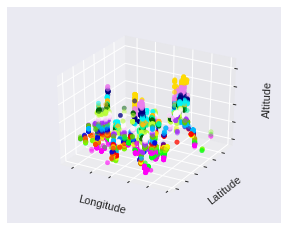

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab
import random
import math
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
drive.mount('/content/gdrive')

#########################################################
# Calculate Euclidean distance:
# Generalized to use the number of elements
# in the first list that is passed in,
# expects that the two lists are of the same size
# returns the Euclidean distance as a float

def euclideanDistance (PointOne, PointTwo):
  runSum = 0
  for i in range (len(PointOne)):
    #print ('PointOne[', i, ']: ', PointOne[i])
    runSum += ( (PointOne[i] - PointTwo[i]) ** 2 )
    
  return math.sqrt(runSum)
    
# end euclideanDistance function
#########################################################

#print ('Euclidean Distance: ', euclideanDistance (muList[0], muList[1]) )

#########################################################
# Calculate Manhattan distance:
# Generalized to use the number of elements
# in the first list that is passed in,
# expects that the two lists are of the same size
# returns the Manhattan distance as a float

def manhattanDistance (PointOne, PointTwo):
  runSum = 0
  for i in range (len(PointOne)):
    runSum += ( abs(PointOne[i] - PointTwo[i]) )
    
  return runSum
    
# end manhattanDistance function
#########################################################

#print ('Manhattan Distance: ', manhattanDistance (muList[0], muList[1]) )

#########################################################
# assign a datapoint to the closest cluster center point:
# for each datapoint, calculate the distance to each 
# cluster center point, tracking the index of the 
# shortest distance found
# after checking all clusters, assign n to 
# the list corresponding to the index of muList
# that it is closest to:

def assignN (theFunction):
  convergeFlag = 0
  
  for n in X:
    #closest = euclideanDistance (n, [0.0, 0.0, 0.0])
    closest = theFunction (n, [0.0, 0.0, 0.0])
    tempMu = 0
    for mu in range(len(muList) ):
      #theDistance = euclideanDistance (n, muList[mu])
      theDistance = theFunction (n, muList[mu])

      if theDistance < closest:
        closest = theDistance
        tempMu = mu
    # insert the datapoint n into the corresponding
    # list for cluster mu:
    
    #print ('tempMu: ', tempMu, ' - n: ', n)
    kList[tempMu].append(n)
    labels.append(tempMu)
    
  # After we've put all points in the nearest cluster:
  # re-calculate the cluster center points:
  #print ('len(kList): ', len(kList))
  for theK in range (len(kList) - 1 ):
    theLen  = len(kList[theK]) # The number of datapoints assigned to this cluster
    runLat  = 0.0
    runLong = 0.0
    runAlt  = 0.0
    
    for element in kList[theK]:
      runLat  += element[0]
      runLong += element[1]
      runAlt  += element[2]
    
    if theLen == 0:
      newLat = 0.0
      newLong = 0.0
      newAlt = 0.0
    else:
      newLat  = runLat  / float (theLen)
      newLong = runLong / float (theLen)
      newAlt  = runAlt  / float (theLen)
    
    # if the new cluster center is different than 
    # the current cluster center, update it 
    # and set the convergeFlag to 1
    # if we get through all data points without
    # updating any cluster center points,
    # then we have converged and we will return 0
    
    #print ('theK: ', theK)
    #print ('len(muList): ', len(muList))
    if newLat != muList[theK][0] or newLong != muList[theK][1] or newAlt != muList[theK][2]:
    #if [newLat, newLong, newAlt] != muList[theK]:
      muList[theK] = [newLat, newLong, newAlt]
      convergeFlag = 1
    
  return convergeFlag, labels
    
# end assignN function 
#########################################################




#########################################################
# Main function:

if __name__ == "__main__":
  # Get the number of clusters:
  k = int (input ('How many clusters? : ') )
  
  # Request a number of iterations:
  # If user enters zero, run until convergence:
  t = int (input ('How many iterations? (Type 0 for convergence) : ') )
  
  # initialize convergeFlag to 1:
  # it will return 0 if it has converged
  convergeFlag = 1

  fig1 = plt.figure(1, figsize=(4,3))
  ax = Axes3D(fig1, rect=[0, 0, .95, 1])
  
  #########################################################
  # load data from file:

  X = np.loadtxt(fname='/content/gdrive/My Drive/437/HW2/3D_spatial_network.csv', delimiter=',')
  #X = np.loadtxt(fname='/content/gdrive/My Drive/437/HW2/3D_spatial_networkSmall.csv', delimiter=',')
  #X = np.array([X])

  # end load data from file
  #########################################################

  #print ('len(X[0]): ', len(X[0]))
  
  #########################################################
  # initialize cluster center points:
  # get a list of random indexes in X:
  # To make sure there are no duplicates,
  #
  # The following divides the dataset into k equal sections 
  # and randomly selects one index from each section 
  # to use as a cluster center point

  # muList is the list of cluster center points:

  print ('Initialize muList . . . ') 
  
  muList = []
  cellSize = int (len(X) / k)
  
  first = 0
  last = -1

  for i in range (1,k + 1):
    first = last + 1
    last = (cellSize * i) - 1
    #print ('first: ', first, ' - last: ', last)
    theIndex = random.randint (first, last)
    muList.append(X[theIndex])
    
  print ('complete\n')

  # end initialize cluster center points
  #########################################################

  
  
  
  #########################################################
  # Initialize list to hold all datapoints in their 
  # respective clusters:
  # This creates a list of lists of size len(X)
  # each index will correspond to the index of a 
  # specific cluster center point in muList

  print ('Initialize kList . . .', k)
  
  kList = []
  for i in range (k):
    kList.append([])

  print ('complete\n')
  
  # end initialize lists
  #########################################################

  print ('Euclidean\n\n')
  #print ('Manhattan\n\n')
  
  if t != 0:
    for iter in range(t):
      labels = []
      
      convergeFlag, labels = assignN (euclideanDistance)
      #convergeFlag, labels = assignN (manhattanDistance)
  else:
    while convergeFlag == 1:
      convergeFlag, labels = assignN (euclideanDistance)
      #convergeFlag, labels = assignN (manhattanDistance)
  
  ax.scatter([row[0] for row in X], [row[1] for row in X], [row[2] for row in X], \
             c=[int(i % k) for i in labels], cmap=pylab.cm.gist_ncar)
  '''

  ax.scatter([row[0] for row in X], [row[1] for row in X], [row[2] for row in X], \
             cmap=pylab.cm.gist_ncar)

  '''
  ax.w_xaxis.set_ticklabels([])
  ax.w_yaxis.set_ticklabels([])
  ax.w_zaxis.set_ticklabels([])

  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  ax.set_zlabel('Altitude')

  ax.dist = 12
  
  # end euclidean distance
  #########################################################

  